In [1]:
import scanpy as sc
import numpy as np
import anndata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')
import batchglm.api as glm
import diffxpy.api as de
warnings.filterwarnings('default')

In [3]:
print("batchglm version "+glm.__version__)
print("diffpy version "+de.__version__)

batchglm version v0.6.8
diffpy version v0.6.13


In [4]:
sc.settings.verbosity = 4
sc.settings.set_figure_params(dpi=80)

In [5]:
prefix = '/data/xyzeq/'

In [6]:
adata = sc.read_loom(prefix + 'xyzeq/individual.raw.and.proc.h5ads/L20C1_raw.loom')

/home/ghartoularos/anaconda3/envs/xyzeq/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [44]:
adata.write_csvs(prefix + 'xyzeq/individual.raw.and.proc.h5ads/')

writing '.csv' files to /data/xyzeq/xyzeq/individual.raw.and.proc.h5ads


In [7]:
adata.write_h5ad(prefix + 'xyzeq/individual.raw.and.proc.h5ads/yun.xyzeq.files/L20C1_raw.h5ad')

... storing 'CellType' as categorical
... storing 'Tissue_2' as categorical
... storing 'barcode' as categorical
... storing 'cell_call' as categorical
... storing 'leiden' as categorical


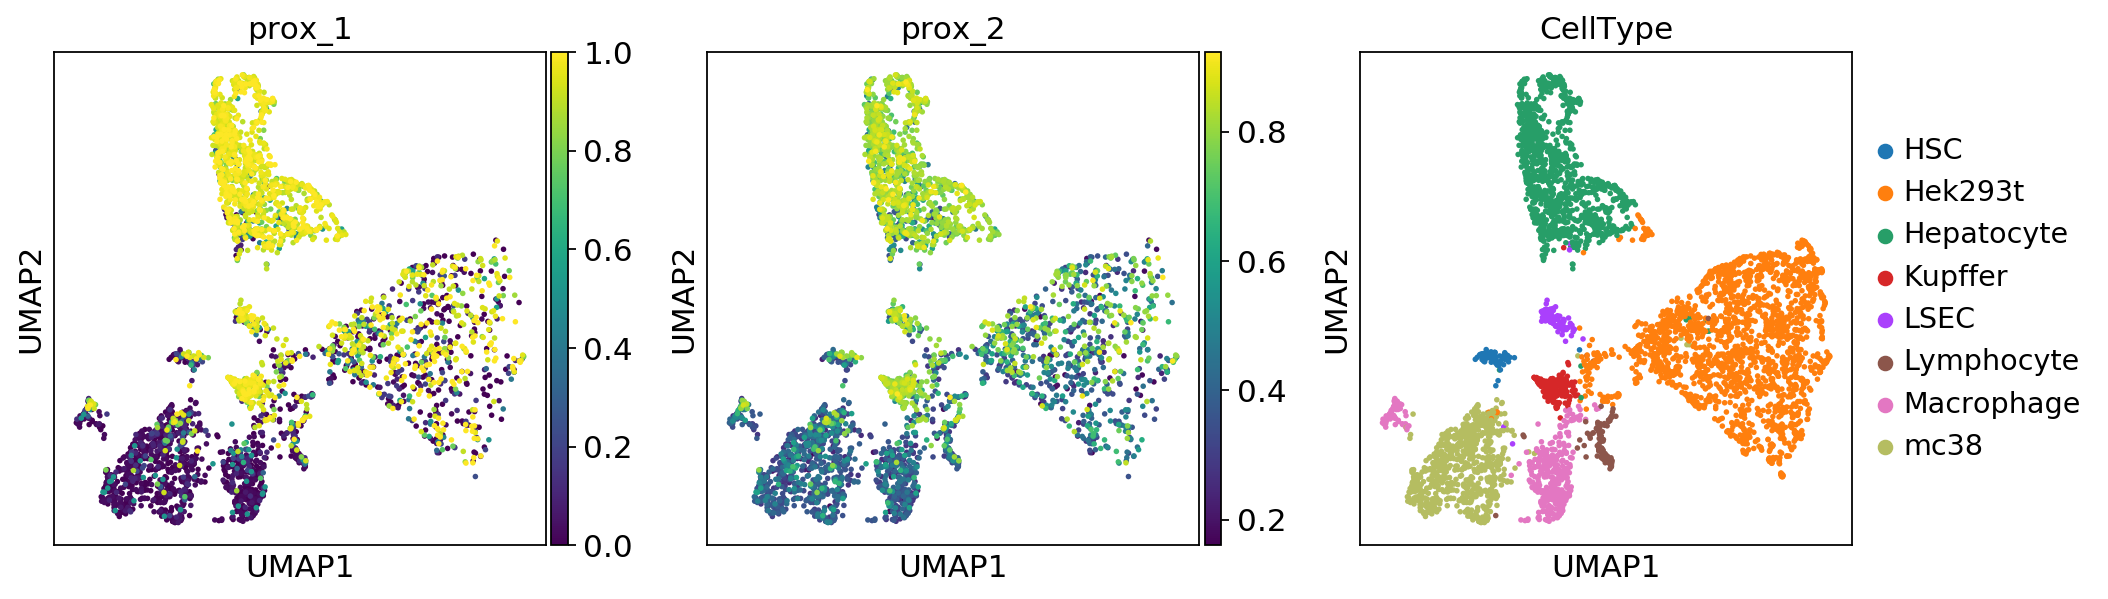

In [30]:
sc.pl.umap(adata, color=['prox_1','prox_2', 'CellType'])

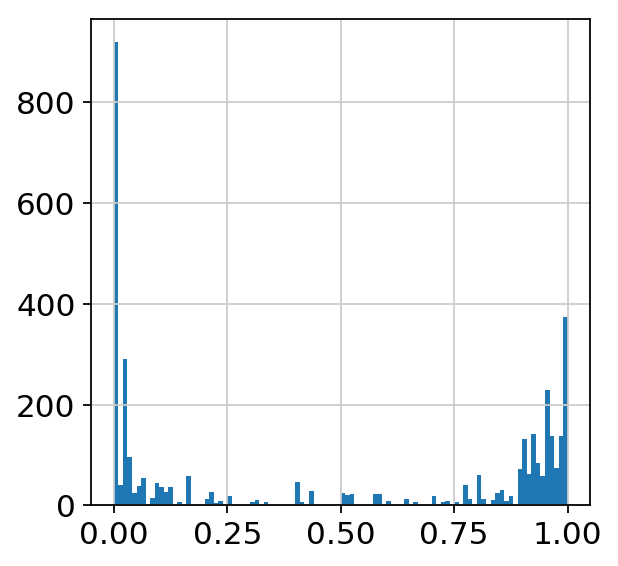

In [28]:
fig, ax = plt.subplots(1, 2)
plt.hist(adata.obs['prox_1'].values,bins=100);

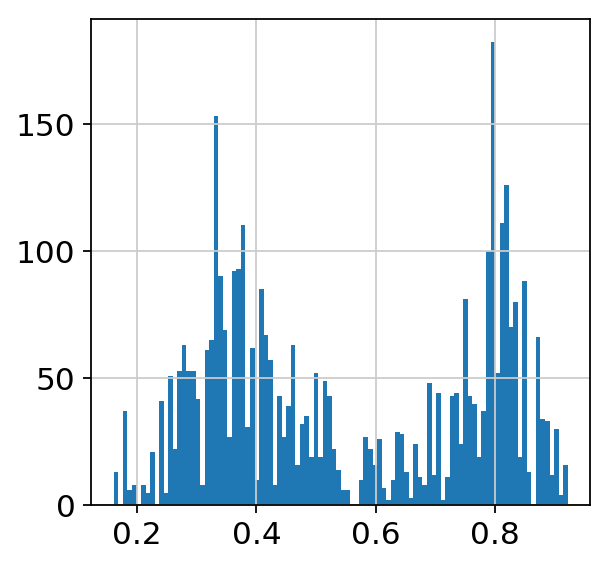

In [27]:
plt.hist(adata.obs['prox_2'].values,bins=100);

In [12]:
from batchglm.api.models.glm_nb import Simulator

In [13]:
sim = Simulator(num_observations=700, num_features=100)
sim.generate_sample_description(num_batches=0, num_conditions=7)
sim.generate_params(
    rand_fn_loc=lambda shape: np.random.uniform(-0.1, 0.1, shape),
    rand_fn_scale=lambda shape: np.random.uniform(0.1, 2, shape)
)
sim.generate_data()

data = anndata.AnnData(
    X=sim.x,
    var=pd.DataFrame(index=["gene" + str(i) for i in range(sim.x.shape[1])]),
    obs=sim.sample_description
)

Transforming to str index.


In [14]:
time_list = np.array([1, 2, 3, 4, 5, 8, 10])
data.obs["time"] = [time_list[int(x)] for x in data.obs["condition"].values]
data.obs["individual"] = [str(np.random.randint(0, 3)) + "_" + str(x) for x in data.obs["time"].values]

In [26]:
adata

AnnData object with n_obs × n_vars = 4788 × 54515 
    obs: 'CellType', 'Tissue_2', 'barcode', 'cell_call', 'human_counts', 'leiden', 'log_counts', 'mouse_counts', 'n_counts', 'n_genes', 'percent_contam', 'percent_mito_human', 'percent_mito_mouse', 'prox_1', 'prox_2', 'ratio'
    var: 'log_cells', 'n_cells'
    obsm: 'X_pca', 'X_umap'

In [41]:
adata.obs

,CellType,Tissue_2,barcode,cell_call,human_counts,leiden,log_counts,mouse_counts,n_counts,n_genes,percent_contam,percent_mito_human,percent_mito_mouse,prox_1,prox_2,ratio
L20C1_P1A01F.CTCATACCTGCTACCT,Hepatocyte,Liver,CTCATACCTGCTACCT,M,537.0,1,3.771514,5372.0,5909.0,1859,8.529362,0.016923,0.000000,0.891892,0.737728,1.000162
L20C1_P1A01F.CCTAGCTCCAGTATTA,Hek293t,None,CCTAGCTCCAGTATTA,H,3113.0,8,3.504335,81.0,3194.0,1174,2.066374,0.031309,0.000000,NaN,NaN,-1.584694
L20C1_P1A01F.ATTCCTTCCGCATTAC,Hek293t,None,ATTCCTTCCGCATTAC,H,5177.0,8,3.727785,166.0,5343.0,1682,3.799364,0.598914,0.000000,NaN,NaN,-1.493970
L20C1_P1A01F.CTAGGTCTAGTGCAAT,Kupffer,Liver,CTAGGTCTAGTGCAAT,C,162.0,10,2.800717,470.0,632.0,297,11.392405,0.000000,0.158228,1.000000,0.852142,0.462583
L20C1_P1A01F.AGCAGCTTAACCTCTC,Hek293t,None,AGCAGCTTAACCTCTC,H,798.0,7,2.920645,35.0,833.0,352,4.561825,1.440576,0.000000,NaN,NaN,-1.357935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L20C1_P4H12F.GGTAATGACTTGCAGA,mc38,Tumor_Outer,GGTAATGACTTGCAGA,M,93.0,0,3.567732,3603.0,3696.0,1301,6.277056,0.000000,0.649351,0.000000,0.375604,1.588181
L20C1_P4H12F.GAGACATCCGGTATAC,Macrophage,Tumor_Inner,GAGACATCCGGTATAC,M,13.0,5,2.745855,544.0,557.0,212,4.847397,0.000000,0.000000,0.000000,0.278353,1.621656
L20C1_P4H12F.TTGGACGTGAGATAGT,mc38,Tumor_Outer,TTGGACGTGAGATAGT,M,17.0,0,2.978180,934.0,951.0,365,1.997897,0.000000,0.000000,0.000000,0.524051,1.739898
L20C1_P4H12F.TCCACTGGAGTGTCGC,Macrophage,Tumor_Inner,TCCACTGGAGTGTCGC,M,10.0,5,2.808211,633.0,643.0,266,4.043546,0.000000,0.000000,0.000000,0.296212,1.801404


In [40]:
det = de.test.continuous_1d(
    data=adata.X,
    sample_description=adata.obs,
    gene_names=adata.var_names,
    formula_loc="~ 1 + prox_2",
    formula_scale="~ 1",
    factor_loc_totest="prox_2",
    continuous="prox_2",
    size_factors=np.random.uniform(0.2, 2, adata.n_obs),
    df=4,
    quick_scale=False
)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 100 and the array at index 1 has size 0

In [16]:
det.summary().iloc[:5, :]

,gene,pval,qval,log2fc,mean,zero_mean,grad,ll
0,gene0,0.000698,0.011459,0.600434,516.115723,False,0.000008,-5132.681494
1,gene1,0.027612,0.092039,0.360879,481.445709,False,0.000011,-5046.260610
2,gene2,0.682816,0.711266,0.195636,491.042847,False,0.000011,-5100.457735
3,gene3,0.525172,0.590080,0.246669,543.315735,False,0.000009,-5190.951392
4,gene4,0.378496,0.473120,0.256492,495.584290,False,0.000013,-5099.197700


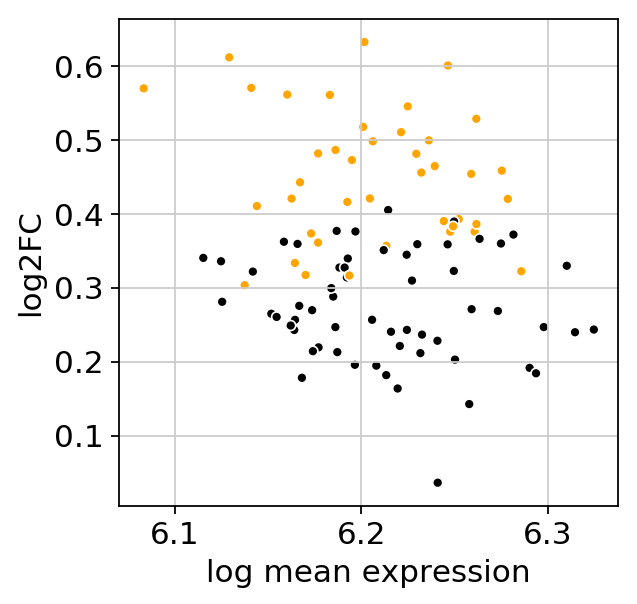

In [17]:
det.plot_ma()

In [18]:
data.obs.columns

Index(['condition', 'batch', 'time', 'individual', 'time0', 'time1', 'time2',
       'time3'],
      dtype='object')

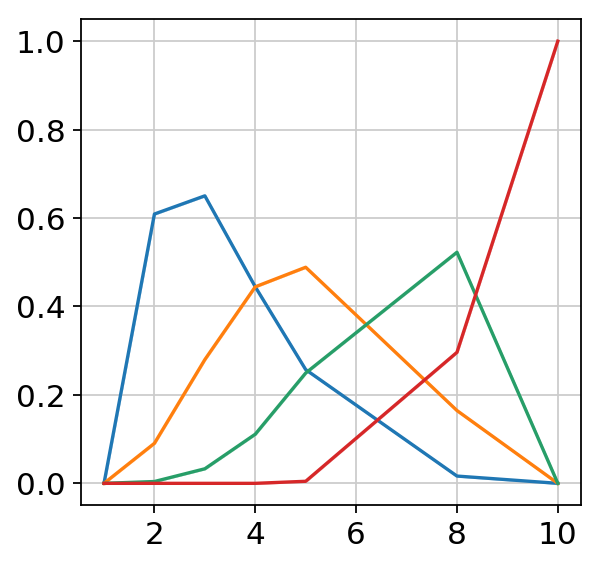

In [19]:
for x in ['time0', 'time1', 'time2', 'time3']:
    sns.lineplot(x=data.obs["time"].values, y=data.obs[x].values)

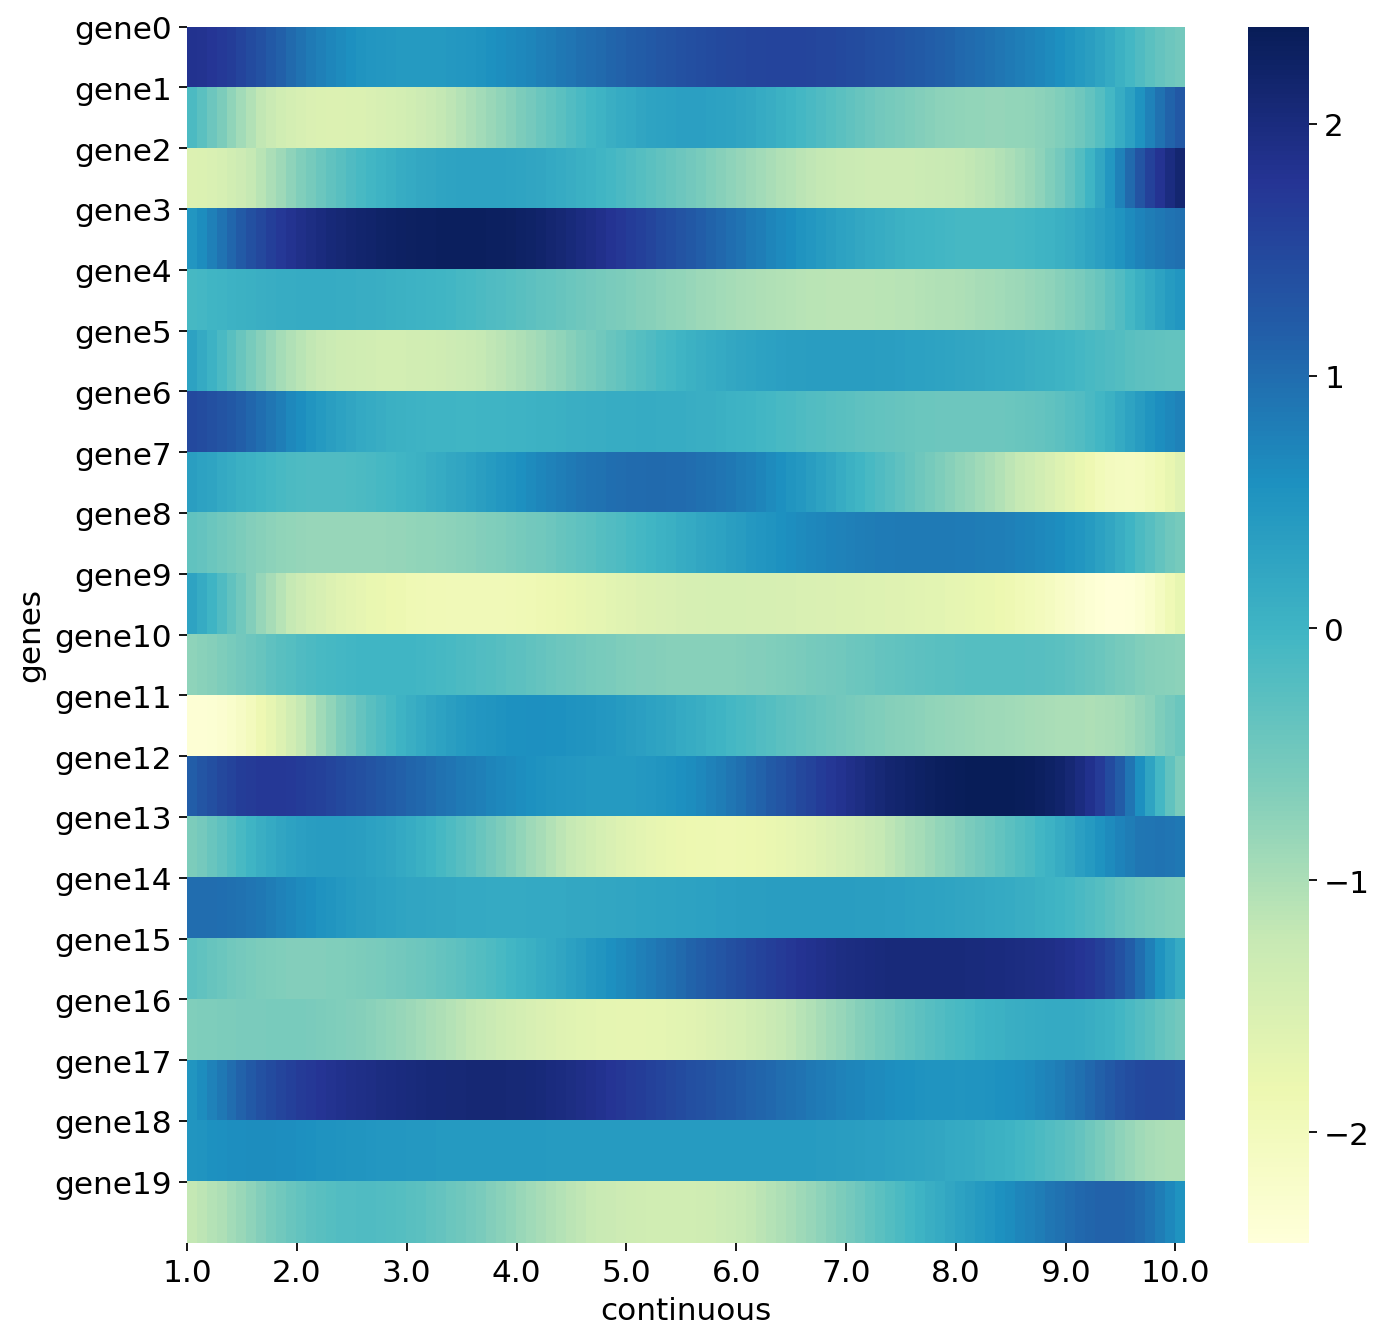

In [20]:
det.plot_heatmap(
    genes=data.var_names[:20],
    transform="zscore"
)